In [1]:
from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import datetime as dt

mpl.rcParams['savefig.dpi'] = 100 
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams.update({'font.size': 40})

%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

import matplotlib.dates as mdates

# GeoJSON

https://mygeodata.cloud/

Test with

http://geojson.io/#map=11/40.6702/-73.9751

In [18]:
import json

gjs = json.load(open('taxi_zones.geojson', 'r'))

In [22]:
len(gjs['features'])

263

In [32]:
gjs['features'][33]['geometry']['coordinates'][0][:5]

[[[-73.972320321199, 40.70908288315217],
  [-73.97066975742995, 40.70725970882147],
  [-73.97054062182238, 40.70731607635383],
  [-73.9702621853228, 40.70688750428401],
  [-73.97048881848585, 40.70540066562183],
  [-73.97016894509909, 40.70536185340731],
  [-73.97018075572805, 40.70492927056683],
  [-73.96762114779943, 40.70334850519435],
  [-73.96751516691086, 40.70343735687813],
  [-73.96747674493034, 40.703949870956215],
  [-73.96833263747038, 40.70448338458415],
  [-73.96929693837701, 40.70508833122962],
  [-73.96923632685237, 40.70599431249845],
  [-73.96929296374243, 40.707093331047766],
  [-73.96838933699995, 40.7068291869999],
  [-73.967951391, 40.70573121699989],
  [-73.96761547799979, 40.70496163499989],
  [-73.96720961999985, 40.70425570899992],
  [-73.96653747199994, 40.70369661299984],
  [-73.96607413599993, 40.70332015299992],
  [-73.965874186, 40.70315769499991],
  [-73.9652043899999, 40.702622744999864],
  [-73.96451844799995, 40.702074977999885],
  [-73.96386889399994,

In [23]:
gjs['features'][3]

{u'geometry': {u'coordinates': [[[-73.97177410965318, 40.72582128133706],
    [-73.97179142961484, 40.725814221149086],
    [-73.97181650587731, 40.72581496675258],
    [-73.97185935830923, 40.72558296903032],
    [-73.97187437695212, 40.725503116079736],
    [-73.97188490951471, 40.72542440506575],
    [-73.97191120732053, 40.7252903706999],
    [-73.97193374501082, 40.72517629035116],
    [-73.97193975456328, 40.72515803861004],
    [-73.97196154778592, 40.72503997881086],
    [-73.97200511841213, 40.72484148970816],
    [-73.97203666966881, 40.72468407002009],
    [-73.97206595867397, 40.72455915832873],
    [-73.97207196960339, 40.72453635085808],
    [-73.97208098151924, 40.72449756793038],
    [-73.97208400057282, 40.72446790554569],
    [-73.97209751290907, 40.72442341523471],
    [-73.97215609001734, 40.724170178278094],
    [-73.97216585996632, 40.72413196327314],
    [-73.9722169237619, 40.72393005464676],
    [-73.9722334467696, 40.72384677992629],
    [-73.97226499868246, 4

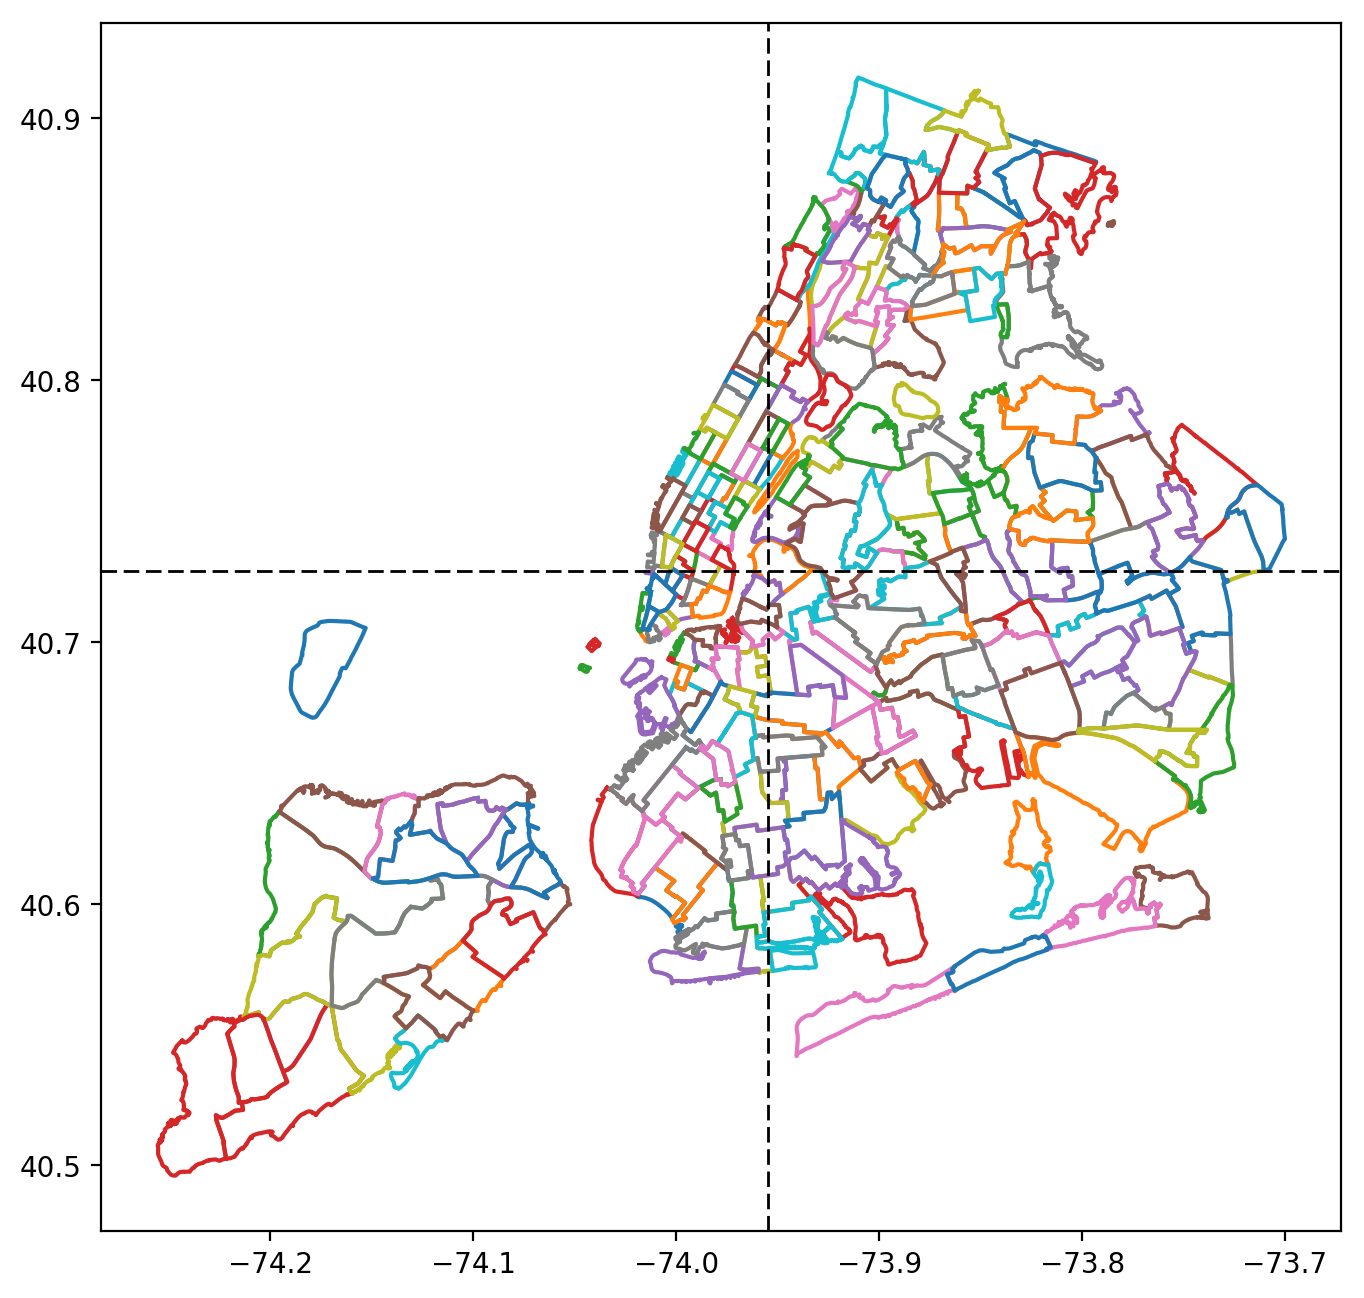

In [60]:
plt.figure(figsize=(8,8))
test_lon, test_lat = -73.955, 40.727
for feature in gjs['features']:
    coords = feature['geometry']['coordinates'][0]
    if len(coords) < 3:
        coords = coords[0]
    x = [i[0] for i in coords]
    y = [i[1] for i in coords]
    plt.plot(x,y)
plt.axhline(y=test_lat, linewidth=1, color='k', linestyle='--')
plt.axvline(x=test_lon, linewidth=1, color='k', linestyle='--')
plt.show()

In [61]:
from shapely.geometry import shape, Point
# depending on your version, use: from shapely.geometry import shape, Point

# construct point based on lon/lat returned by geocoder
point = Point(test_lon, test_lat)

# check each polygon to see if it contains the point
for feature in gjs['features']:
    polygon = shape(feature['geometry'])
    if polygon.contains(point):
        print ('Found containing polygon:', json.dumps(feature['properties'], indent=2))

Found containing polygon: {
  "Shape_Area": 0.000462068671429, 
  "OBJECTID": 112, 
  "zone": "Greenpoint", 
  "LocationID": 112, 
  "Shape_Leng": 0.107267875765, 
  "borough": "Brooklyn"
}


In [83]:
import re
zone_names = [str(feat['properties']['zone']) for feat in gjs['features']]
parent_zone_names = [re.sub('/.*', '', zone) for zone in zone_names]

# Read Rentals

In [62]:
import pandas as pd

In [72]:
rentals = pd.read_csv('Neighborhood_MedianRentalPrice_1Bedroom.csv')
rentals = rentals[(rentals['City'] == 'New York') & (rentals['Metro'] == 'New York')]

In [74]:
rentals['RegionName']

2         Upper West Side
4         Upper East Side
5           East New York
9      Washington Heights
11                Astoria
15           Williamsburg
16     Bedford Stuyvesant
17               Flatbush
18          Crown Heights
19                Jamaica
20                 Harlem
21         Williamsbridge
22            East Harlem
23               Bushwick
25          East Flatbush
26                 Corona
27            Sunset Park
28              Concourse
30               Elmhurst
31            Bensonhurst
33              Soundview
34        Lower East Side
36               Flushing
38            Murray Hill
39         Sheepshead Bay
40              Gravesend
42           Forest Hills
43           East Village
46        Jackson Heights
48                Midwood
              ...        
118             Briarwood
119        Brighton Beach
120     Flatiron District
125            Pelham Bay
129          Clinton Hill
134          West Village
135           Kew Gardens
137      Bro

In [85]:
reg_name = set(rentals['RegionName'])

In [86]:
zon_name = set(parent_zone_names)

In [87]:
# In the regions, but not zones
reg_name - zon_name

{'Bedford Stuyvesant',
 'Bensonhurst',
 'Bushwick',
 'Chelsea',
 'Clinton',
 'Columbus Circle',
 'Concourse',
 'Crown Heights',
 'Downtown',
 'East Harlem',
 'Financial District',
 'Flatiron District',
 'Fordham',
 'Fort Hamilton',
 'Greenwich Village',
 'Greenwood',
 'Harlem',
 'Hunters Point',
 'Kingsbridge',
 'Midtown',
 'Morris Park',
 'NoHo',
 'Ocean Parkway',
 'Sunset Park',
 'Tremont',
 'Tribeca',
 'Tudor City',
 'Turtle Bay',
 'Upper East Side',
 'Upper West Side',
 'Washington Heights',
 'Williamsburg'}

In [88]:
# In zones, but not regions.
zon_name - reg_name

{'Allerton',
 'Alphabet City',
 'Arden Heights',
 'Arrochar',
 'Astoria Park',
 'Auburndale',
 'Baisley Park',
 'Battery Park City',
 'Bay Terrace',
 'Bedford',
 'Bellerose',
 'Belmont',
 'Bensonhurst East',
 'Bensonhurst West',
 'Bloomfield',
 'Bloomingdale',
 'Borough Park',
 'Breezy Point',
 'Broad Channel',
 'Bronx Park',
 'Bronxdale',
 'Brooklyn Navy Yard',
 'Brownsville',
 'Bushwick North',
 'Bushwick South',
 'Cambria Heights',
 'Canarsie',
 'Central Harlem',
 'Central Harlem North',
 'Charleston',
 'Chinatown',
 'City Island',
 'Claremont',
 'Clinton East',
 'Clinton West',
 'Co-Op City',
 'College Point',
 'Columbia Street',
 'Coney Island',
 'Country Club',
 'Crotona Park',
 'Crotona Park East',
 'Crown Heights North',
 'Crown Heights South',
 'Cypress Hills',
 'DUMBO',
 'Douglaston',
 'Downtown Brooklyn',
 'Dyker Heights',
 'East Chelsea',
 'East Concourse',
 'East Elmhurst',
 'East Flushing',
 'East Harlem North',
 'East Harlem South',
 'East Tremont',
 'East Williamsburg',

In [89]:
# Overlap?
len(zon_name) - len(zon_name - reg_name)

57

Task: I have two area namespaces. The taxi trip data is more granular than the apartment listings. What to do?

Group taxi zones into apartment zones. How?